In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

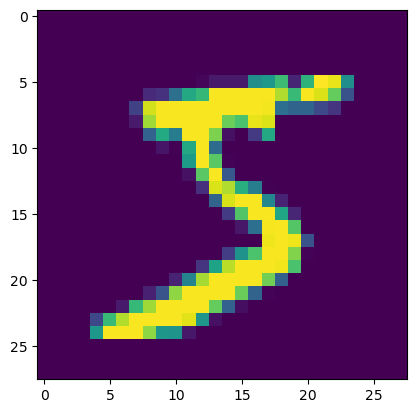

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show
#plt.imshow(x_train[0],cmap=plt.cm.binary)
#plt.show

## checking value of each pixel

Before normalization

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

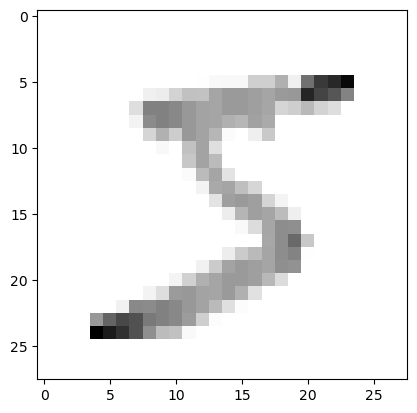

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1) #normalise means divide by 255
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np 
img_size=28
x_train=np.array(x_train).reshape(-1,img_size,img_size,1)#increasing one dimension for kernel opr
x_test=np.array(x_test).reshape(-1,img_size,img_size,1)
print('train dimension',x_train.shape,'\n','test dimension',x_test.shape)


train dimension (60000, 28, 28, 1) 
 test dimension (10000, 28, 28, 1)


### creating a deep neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model =Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))# activation function
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))# activation function
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))# activation function
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))# activation function

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 30s 21ms/step - loss: 0.3092 - accuracy: 0.9034 - val_loss: 0.1028 - val_accuracy: 0.9684
Epoch 2/5
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0937 - accuracy: 0.9713 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 3/5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0663 - accuracy: 0.9796 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 4/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0541 - accuracy: 0.9829 - val_loss: 0.0604 - val_accuracy: 0.9816
Epoch 5/5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0611 - val_accuracy: 0.9823


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0572 - accuracy: 0.9841
0.05723661929368973 0.9840999841690063


In [ ]:
predictions=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print(predictions)

[[2.8599162e-10 1.2978185e-06 7.3186002e-06 ... 9.9998939e-01
  4.6792557e-08 6.6254285e-07]
 [9.8721241e-05 1.2485059e-06 9.9989796e-01 ... 8.9521471e-08
  2.4505303e-07 9.8717891e-08]
 [7.3327459e-07 9.9997342e-01 1.2906851e-07 ... 5.1091661e-07
  1.0675488e-07 1.3623486e-07]
 ...
 [9.4128338e-10 5.2595606e-08 2.6461869e-08 ... 4.4703410e-07
  1.8346200e-06 9.8703106e-07]
 [6.2193944e-06 1.0926641e-06 2.3791723e-07 ... 2.2984028e-07
  1.3277117e-02 1.7616465e-05]
 [3.4784017e-07 2.8279269e-08 1.3274725e-07 ... 2.8046452e-09
  1.0166585e-06 1.9516131e-08]]


In [43]:
print(np.argmax(predictions[1]))
predictions[1]

2


array([9.8721241e-05, 1.2485059e-06, 9.9989796e-01, 1.2851254e-06,
       6.4631713e-08, 5.8336087e-09, 2.1272044e-07, 8.9521471e-08,
       2.4505303e-07, 9.8717891e-08], dtype=float32)

7


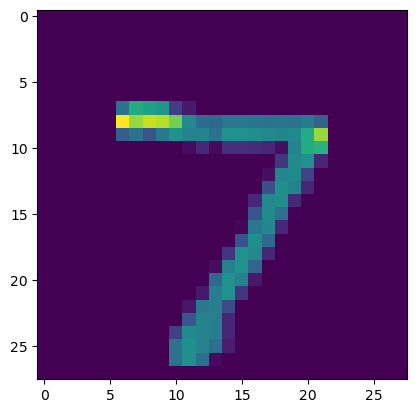

In [40]:

plt.imshow(x_test[0])
print(y_test[0])